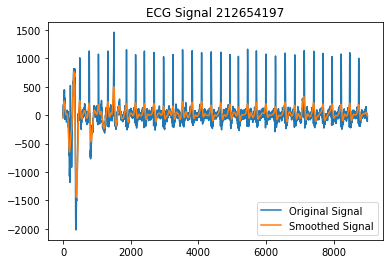

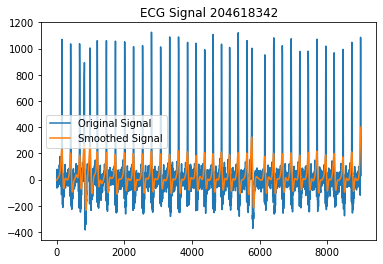

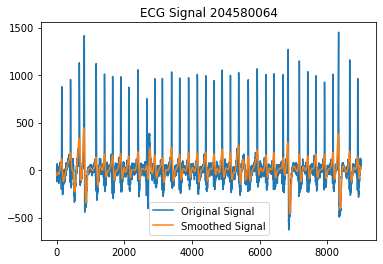

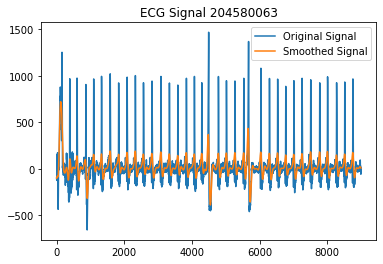

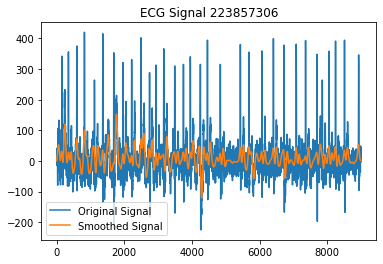

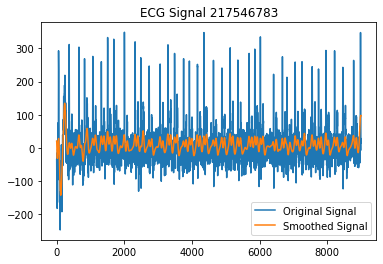

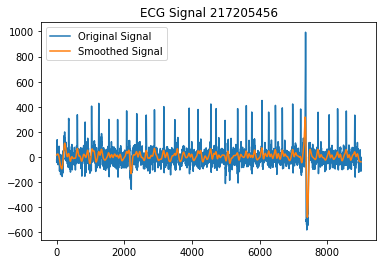

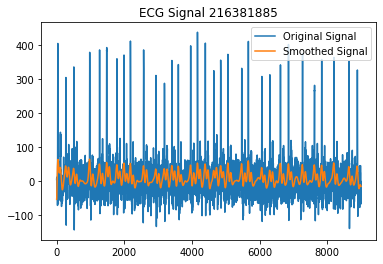

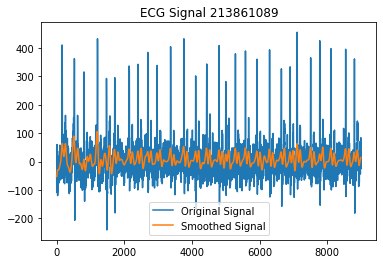

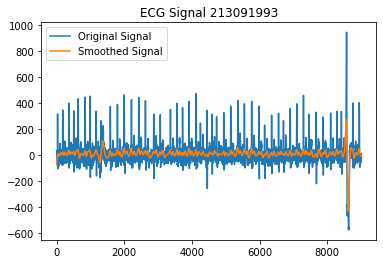

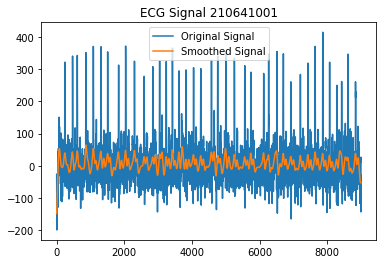

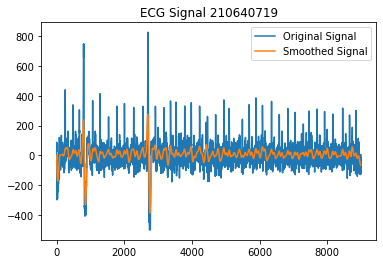

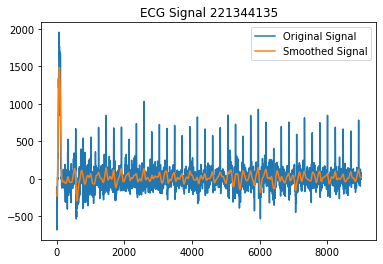

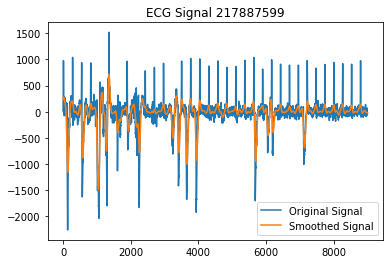

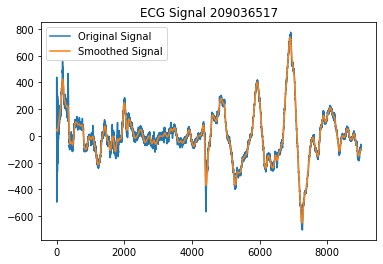

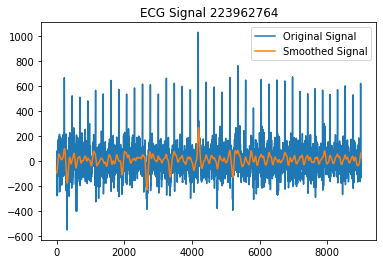

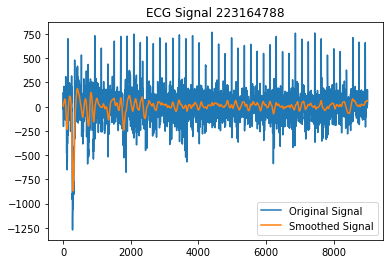

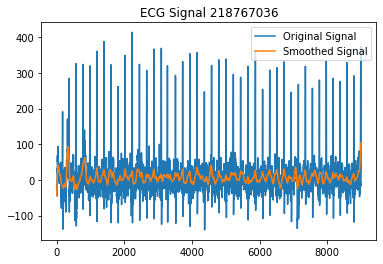

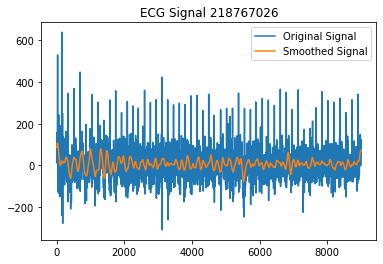

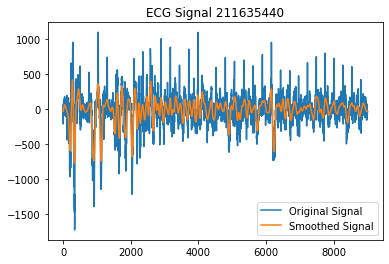

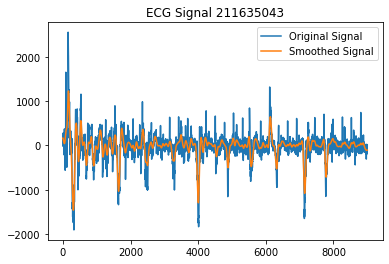

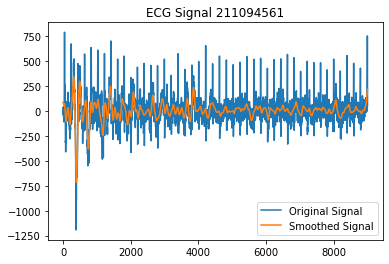

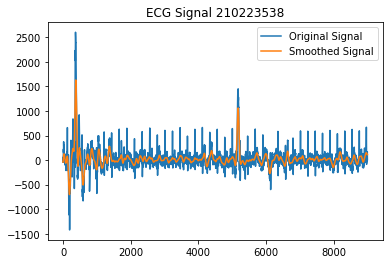

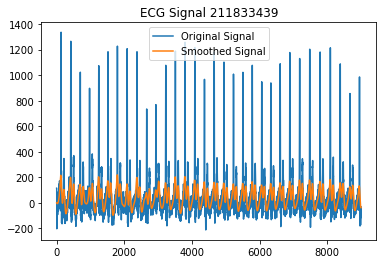

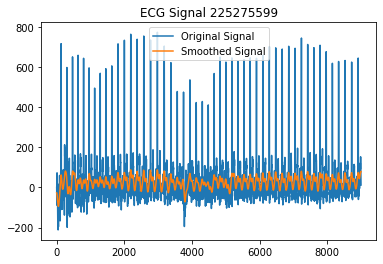

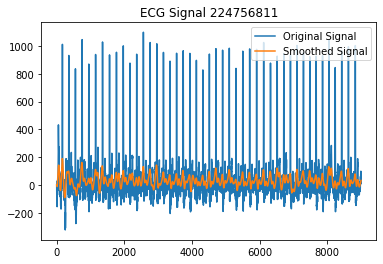

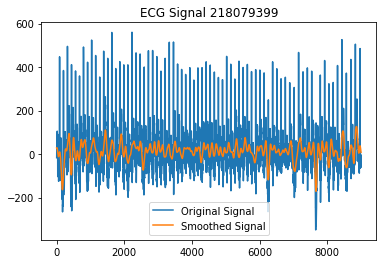

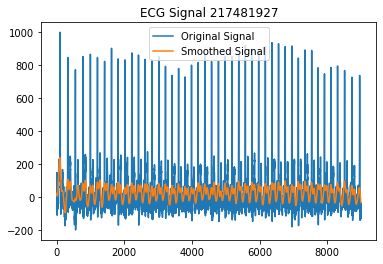

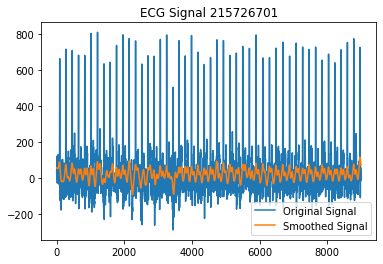

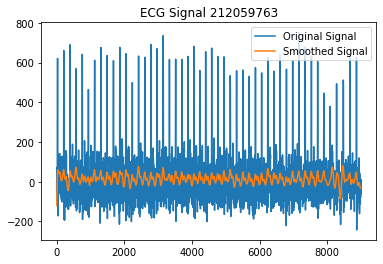

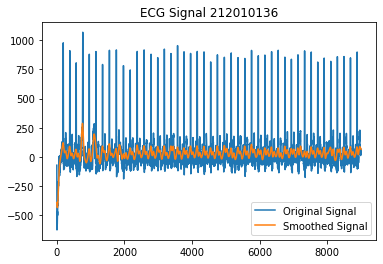

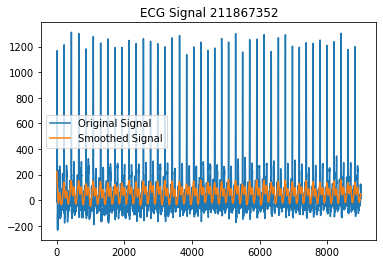

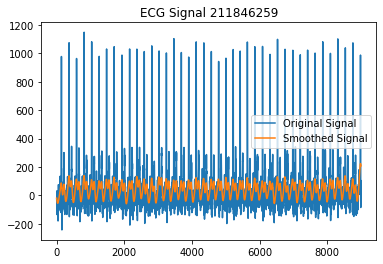

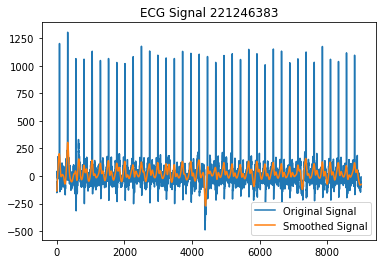

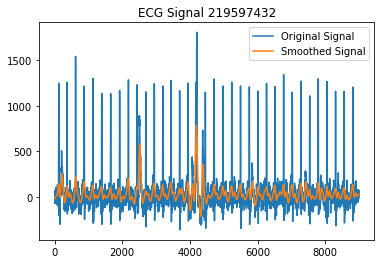

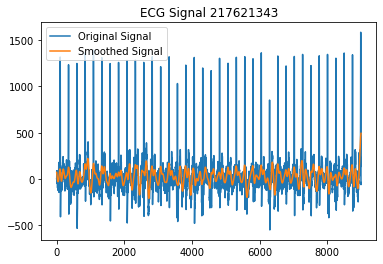

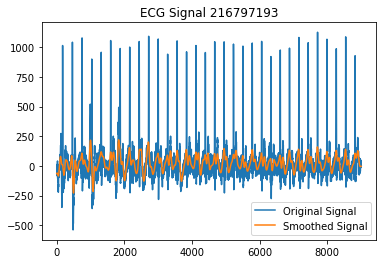

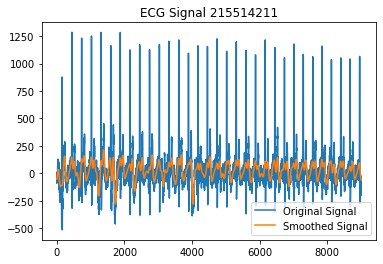

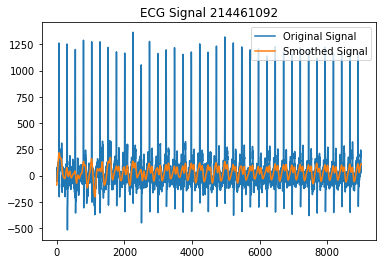

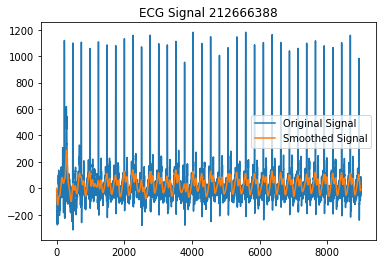

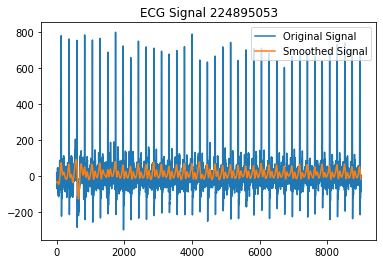

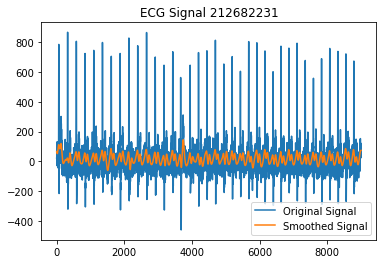

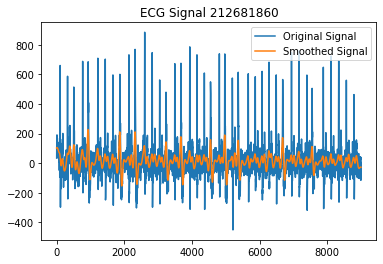

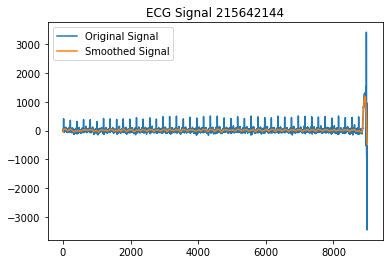

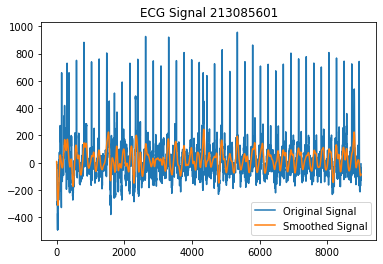

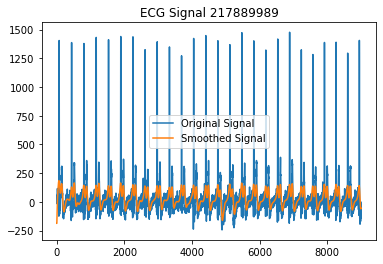

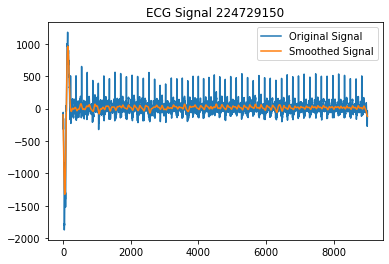

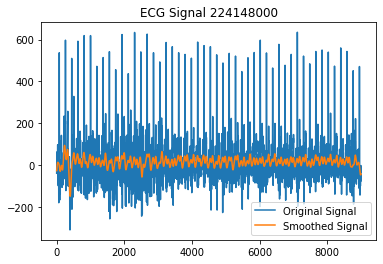

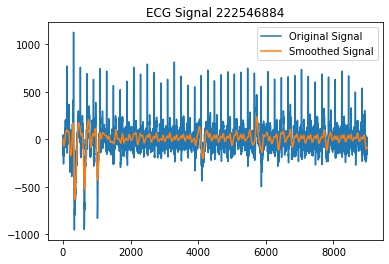

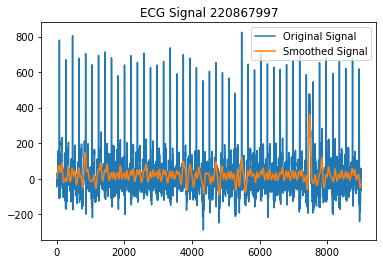

In [2]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, butter, filtfilt, medfilt

filename = 'ecg_signal.csv'
df = pd.read_csv(filename)

# Daten extrahieren
ecg_signal_ids = df['ecg_signalid'].values
ecg_signals = df['ecg_signal'].apply(lambda x: list(ast.literal_eval(x)['signal'].values())).values

smoothed_signals = []

for ecg_signal_id, ecg_signal in zip(ecg_signal_ids, ecg_signals):
    # Smoothing mit Savitzky-Golay Filter
    window_size = 71 # Anpassen Smoothing
    polynomial_order = 3
    sg_smoothed_signal = savgol_filter(ecg_signal, window_size, polynomial_order)

    # Danach Butterworth filter
    cutoff_frequency = 0.01 # Anpassen Smoothing
    butter_order = 2  
    nyquist_frequency = 0.5
    normalized_cutoff = cutoff_frequency / nyquist_frequency
    b, a = butter(butter_order, normalized_cutoff, btype='low')
    bw_smoothed_signal = filtfilt(b, a, sg_smoothed_signal)

    # Und als letztes Median Filter 
    median_window_size = 3  # Anpassen Smoothing
    median_smoothed_signal = medfilt(bw_smoothed_signal, median_window_size)

    smoothed_signals.append(median_smoothed_signal)

    # Plotting mit Vergleich zu Original-Daten
    plt.figure()
    plt.plot(ecg_signal, label='Original Signal')
    plt.plot(median_smoothed_signal, label='Smoothed Signal')
    plt.title(f'ECG Signal {ecg_signal_id}')
    plt.legend()
    plt.show()